In [1]:
# Initializing information
from sklearn.datasets import load_iris
iris_data = load_iris()

# Store the data into variables
X_feat = iris_data.data 
y_trgt = iris_data.target


In [2]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_feat, y_trgt)

# Predicting the values
logreg.predict(X_feat)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Logistic regression is another generalized linear model (GLM) procedure using the same basic formula, 
but instead of the continuous Y, it is regressing for the probability of a categorical outcome. 
In simplest form, this means that we're considering just one outcome variable and two states 
of that variable- either 0 or 1.



In [3]:
# Storing all the predictions
y_pred = logreg.predict(X_feat)
len(y_pred)

150

In [4]:
# Compare the predicted values with the actual values
from sklearn import metrics
print(metrics.accuracy_score(y_trgt, y_pred))

0.96


## KNN Model (5 Neighbors)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_feat, y_trgt)
y_pred = knn.predict(X_feat)
print(metrics.accuracy_score(y_trgt, y_pred))

0.966666666667


# Splitting the data into a testing and a training set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_trgt, test_size=0.4, random_state=4)

In [7]:
# Verify the shape of the new datatsets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(90, 4) (60, 4)
(90,) (60,)


In [8]:
# Use this new dataset to check prediction (This purpose of this is to prevent overfitting)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Make the prediction for the logisitic regression on the training sets
y_pred = logreg.predict(X_test)

# Compare prediction with the actual values
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [10]:
# Make the prediction for the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compare prediction with the actual values
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [11]:
# Work through a loop to obtain the best value of the neighbors parameters in the KNeighnors model
k_range = range(1,25)
acc_score = []

for k_val in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc_score.append(metrics.accuracy_score(y_test, y_pred))

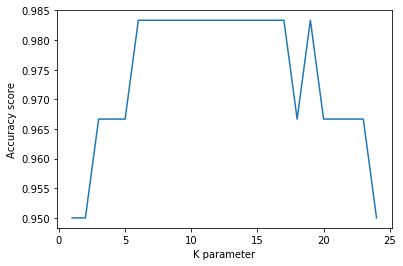

In [14]:
# Visual of all the parameters of k
import matplotlib.pyplot as plt

# Allows for plotting to be done within the notebook
%matplotlib inline

# Plotting the visual between the each k and its score
plt.plot(k_range, acc_score)
plt.xlabel('K parameter')
plt.ylabel('Accuracy score')
plt.show()

- Note that this a good way but because we are splitting the data, we might get some values in some datasets repeatly while other features might not appear in the data.
- Hence, we use k-fold to repeat this entire process and decrease the variance in the estimate.
- Result: 
    - Plotting the k parameter with its accuracy is a great way to detail in the the best predictators
    - The sweet spot seems to between 6 and 16 as the n_neighbors